# John Politte O'Reilly Media TakeHome

## Email: johncpolitte@yahoo.com
## Phone: 512-771-5764

### Libraries Used

In [70]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# DataFrame Creation

In [2]:
df = pd.read_csv('data/sampled_training')

In [3]:
df_test = pd.read_csv('data/sampled_test',index_col=False, names =['id','hour','C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21',])

In [4]:
df

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002028568167339219,0,14102100,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,...,1,2,20596,320,50,2161,0,35,100148,157
1,10006958186789044052,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,1,0,18993,320,50,2161,0,35,100034,157
2,10011650513707909570,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,21611,320,50,2480,3,297,100111,61
3,10022961149355219548,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,4687,320,50,423,2,39,100148,32
4,10029289556764215760,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,100084,79
5,1002948443498545577,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,1779deee,2347f47a,...,1,0,20596,320,50,2161,0,35,-1,157
6,10033341691920548518,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,100084,79
7,10039148490202159706,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,92e72531,d9b5648e,...,1,0,21611,320,50,2480,3,297,100111,61
8,10039475935406792420,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
9,10040214148118137106,1,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79


In [5]:
df_test

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,635176803480460379,14103000,1002,0,85f751fd,c4e18dd6,50e219e0,27550a3c,7801e8d9,07d7df22,...,0,0,23553,300,50,2699,0,163,-1,212
1,6360170755674123511,14103000,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,17614,320,50,1993,2,1063,-1,33
2,6372531204453459606,14103000,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23726,320,50,2717,2,47,-1,23
3,6375797800199782003,14103000,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
4,638604204480092601,14103000,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17239,320,50,1973,3,39,-1,23
5,6386958778120101437,14103000,1005,0,85f751fd,c4e18dd6,50e219e0,c8e3e3c1,b5f3b24a,8ded1f7a,...,1,2,21667,320,50,2494,3,39,-1,112
6,6387143707312734046,14103000,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,22683,320,50,2528,0,167,100074,221
7,6389402851235863666,14103000,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,...,1,0,21611,320,50,2480,3,297,100111,61
8,6391502531402731530,14103000,1005,1,ec47f32a,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,23536,320,50,2695,0,35,-1,51
9,6391894912345171320,14103000,1002,0,f17ebd97,5888d1c7,50e219e0,ecad2386,7801e8d9,07d7df22,...,0,0,23438,320,50,2684,2,1327,-1,52


### Date Time Manipulation

Added 20 to hour column for easier conversion to date time

In [6]:
df['hour']=df.hour + 2000000000
df_test['hour']=df_test.hour + 2000000000

Converted hour column to date times

In [7]:
df['DateTime']=df['hour'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d%H'))
df_test['DateTime']=df_test['hour'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d%H'))

Created a day of the week Column

In [8]:
df['day_of_week']=df['DateTime'].dt.dayofweek
df_test['day_of_week']=df_test['DateTime'].dt.dayofweek

Created a Column that is just the hour of the day

In [9]:
df['hour_of_day']= df.hour.apply(lambda x: int(str(x)[-2:]))
df_test['hour_of_day']= df_test.hour.apply(lambda x: int(str(x)[-2:]))

In [10]:
df.drop(['DateTime','hour'], axis=1,inplace=True)
df_test.drop(['DateTime','hour'], axis=1,inplace=True)

# EDA

Found the number of unique values for each column 

In [12]:
df.nunique()

id                  843502
click                    2
C1                       7
banner_pos               7
site_id               2366
site_domain           2506
site_category           21
app_id                2211
app_domain             156
app_category            28
device_id            78975
device_ip           153806
device_model          4415
device_type              4
device_conn_type         4
C14                   2019
C15                      8
C16                      9
C17                    390
C18                      4
C19                     64
C20                    158
C21                     55
day_of_week              7
hour_of_day             24
dtype: int64

For some EDA I looked into the distribution of the click rates for all of the variables. They are plotted below

In [13]:
d={}
for x in df.columns[2:]:
    d["{0}".format(x)] = df.groupby(x)['click'].sum()/df.groupby(x)['id'].count()
    

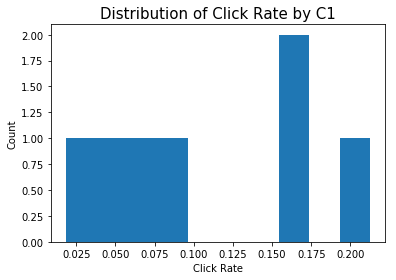

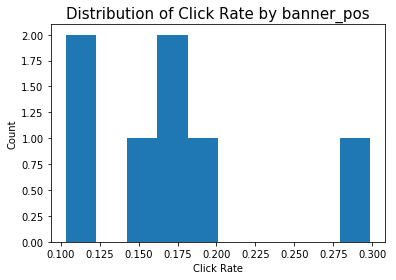

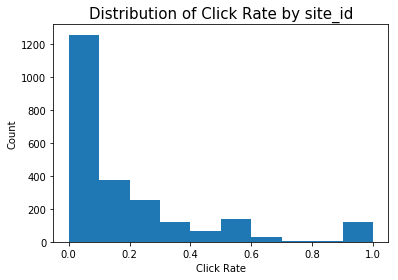

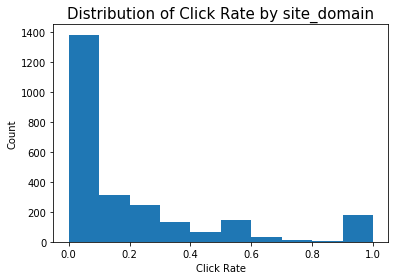

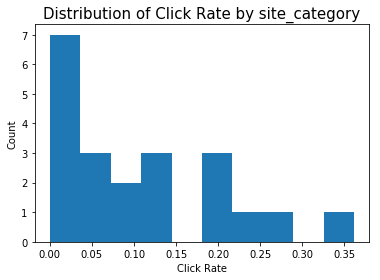

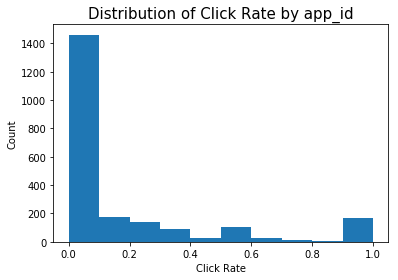

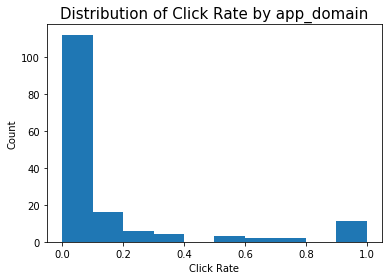

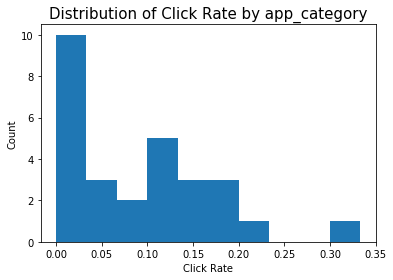

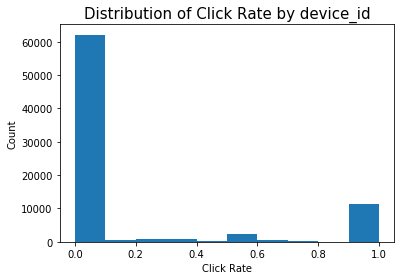

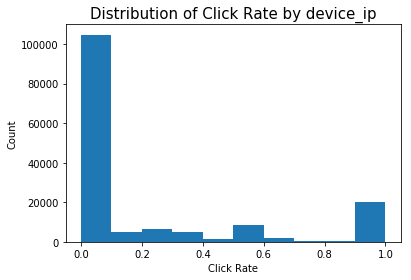

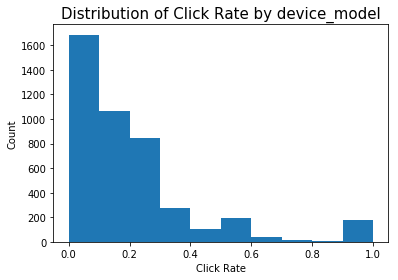

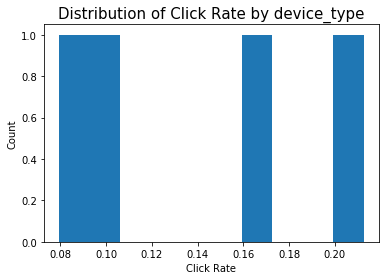

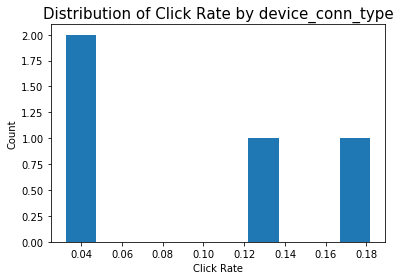

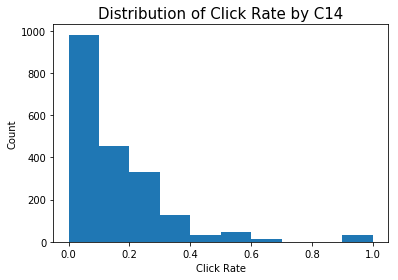

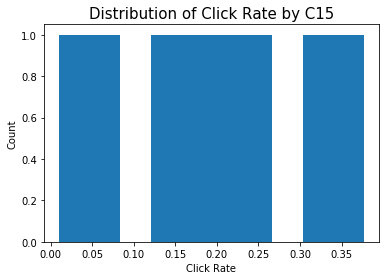

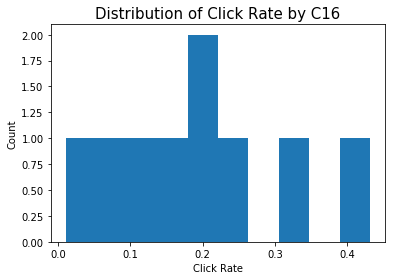

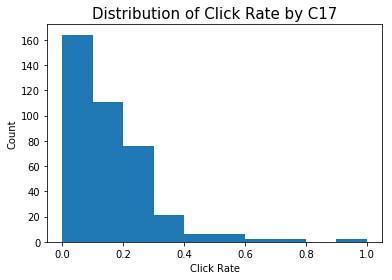

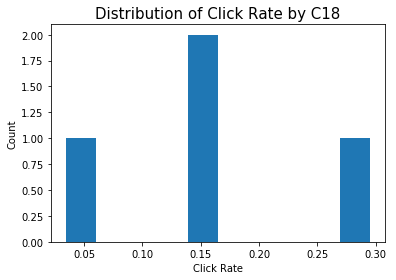

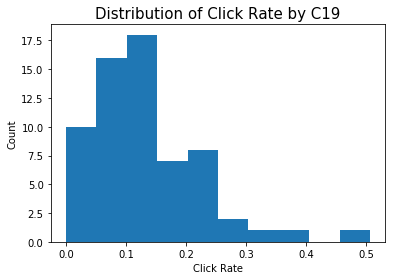

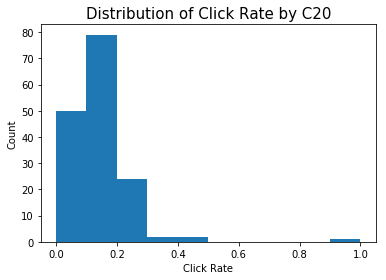

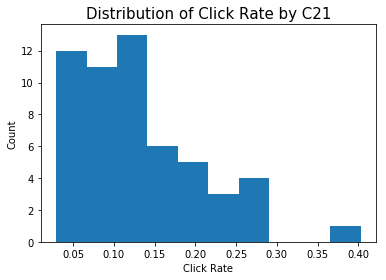

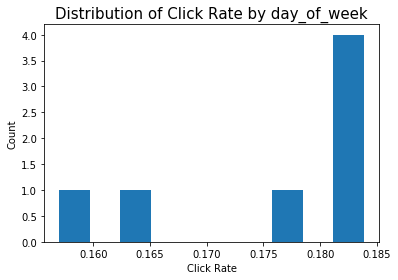

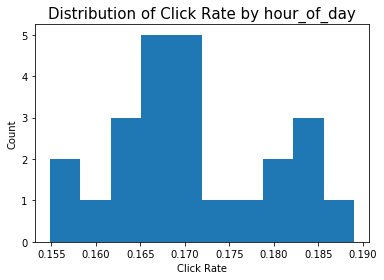

In [14]:
for x in df.columns[2:]:
    fig, ax =plt.subplots()
    ax.set_title("Distribution of Click Rate by {0}".format(x), fontsize = 15)
    ax.set_ylabel("Count", fontsize = 10)
    ax.set_xlabel("Click Rate", fontsize = 10)
    plt.hist(d[x])
    plt.show()

Checked to see how many clicks there were in the data set

In [15]:
df.click.sum()/df.id.count()

0.17027108412309633

17% of the time someone clicked on the add so this will be a good baseline to compare my accuracy to after testing the model

### Click rate based on site_id

This is the number of clicks per site_id divided by the number of id's that visited the site

In [16]:
cr_by_site=df.groupby('site_id')['click'].sum()/df.groupby('site_id')['id'].count()

In [17]:
cr_by_site

site_id
00255fb4    0.052632
003cf93d    0.000000
00476056    0.000000
006ab81e    0.000000
00f5367d    0.500000
00f648b7    0.468750
00f7c6fc    0.000000
011b0fda    0.000000
011e5414    0.228571
01270328    0.168831
0129a661    0.000000
012dc57b    0.000000
013e516e    0.000000
014428c1    0.052632
015cc1dc    0.000000
019de78a    0.500000
01da43f6    0.500000
021cd138    0.275862
0222f9ee    0.000000
0234a6fa    0.500000
023f3644    0.023810
02546dd5    0.047619
0273c5ad    0.204545
028f551e    0.000000
02a66025    0.150000
02d5151c    0.009434
02d5ce7e    0.600000
02e16f58    0.500000
02fb33fd    0.031746
02ffe73f    0.000000
              ...   
fe290a08    0.000000
fe2e8046    0.000000
fe68d958    0.000000
fe7d2ab4    0.100000
fe8cc448    0.034615
fe96dcee    0.000000
fec6e632    0.122038
fee8da23    0.000000
fefe6fb9    0.292683
ff0784fb    0.272727
ff108d09    0.038462
ff18c3d1    0.275720
ff1b88b6    0.166667
ff1bcc6f    0.098039
ff361da0    0.117137
ff4425e5    0.000000
ff55c

### Click rate based on C1

C1_count represents the number of visitors in each C1 category

In [19]:
C1_count = df.groupby('C1')['id'].count()
C1_count

C1
1001       273
1002     50958
1005    768532
1007       830
1008       164
1010     20759
1012      1986
Name: id, dtype: int64

cr_by_C1 is the number of clicks in each C1 category divided by the number of visitors grouped by C1 category

In [20]:
cr_by_C1 = df.groupby('C1')['click'].sum()/C1_count

In [21]:
cr_C1_df = pd.DataFrame(cr_by_C1, columns = ['click_rate'])
cr_C1_df

,click_rate
C1,
1001,0.018315
1002,0.212606
1005,0.170058
1007,0.044578
1008,0.164634
1010,0.091045
1012,0.068479


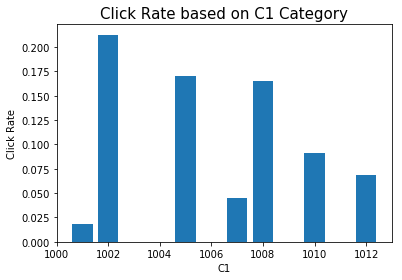

In [22]:
fig, ax = plt.subplots()
ax.set_title("Click Rate based on C1 Category", fontsize = 15)
ax.set_ylabel("Click Rate", fontsize = 10)
ax.set_xlabel("C1", fontsize = 10)
plt.bar(cr_C1_df.index, cr_C1_df.click_rate)
plt.show()

### Click Rate based on device_type

In [23]:
cr_by_device_type = df.groupby('device_type')['click'].sum()/df.groupby('device_type')['id'].count()

In [24]:
cr_by_device_type

device_type
0    0.212606
1    0.169607
4    0.092953
5    0.079595
dtype: float64

There is a difference in click through rate by device type so this is a good place to start

### Feature Selection

For the numerical features I looked at their correlation coef to determine if they should be included in the model

In [25]:
p_corr=df.corr(method='pearson')

In [26]:
p_corr

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,day_of_week,hour_of_day
id,1.000000,-0.001053,0.001370,0.001068,0.000805,0.000931,-0.000793,-0.000884,-0.001600,-0.000855,-0.000715,0.000564,-0.000170,0.000601,0.001090,-0.000454
click,-0.001053,1.000000,-0.044978,0.029441,-0.041951,-0.084891,-0.061945,-0.033455,0.133767,-0.057521,0.034507,0.002505,-0.051692,-0.074052,0.016040,-0.000152
C1,0.001370,-0.044978,1.000000,0.301229,0.907022,0.203077,0.059339,0.125163,0.068348,0.068339,-0.045713,0.016498,-0.029853,0.048386,0.012726,0.002882
banner_pos,0.001068,0.029441,0.301229,1.000000,0.334664,-0.075120,0.006045,0.063989,0.035308,-0.015980,0.058711,0.121661,0.037019,-0.051338,0.010147,-0.002623
device_type,0.000805,-0.041951,0.907022,0.334664,1.000000,0.210430,0.050133,0.182792,0.068220,0.056422,-0.045804,0.010030,-0.049824,0.050424,0.008911,0.005529
device_conn_type,0.000931,-0.084891,0.203077,-0.075120,0.210430,1.000000,0.062140,0.073762,-0.013280,0.074463,-0.056408,-0.004074,0.087794,0.032340,0.023792,0.039419
C14,-0.000793,-0.061945,0.059339,0.006045,0.050133,0.062140,1.000000,0.000886,0.052676,0.974478,-0.257172,-0.169426,0.032627,0.404447,-0.159928,-0.050449
C15,-0.000884,-0.033455,0.125163,0.063989,0.182792,0.073762,0.000886,1.000000,-0.070563,-0.000415,0.016420,0.049068,0.004066,-0.005368,0.007256,-0.003667
C16,-0.001600,0.133767,0.068348,0.035308,0.068220,-0.013280,0.052676,-0.070563,1.000000,0.062768,0.080160,-0.067878,-0.042594,-0.071768,0.011122,0.010131
C17,-0.000855,-0.057521,0.068339,-0.015980,0.056422,0.074463,0.974478,-0.000415,0.062768,1.000000,-0.273576,-0.160558,0.017007,0.422008,-0.167971,-0.048608


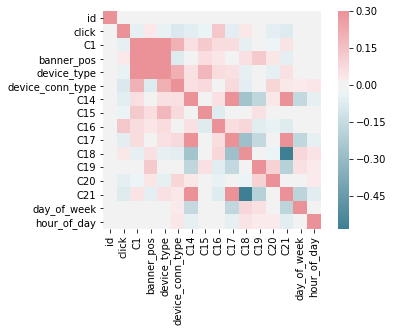

In [27]:
fig, ax = plt.subplots()
hmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(p_corr, cmap=hmap,vmax=.3, center=0,square=True)

banner_pos, C16, and C18 all seem to have a positive correlation to click so they will be included in the model.
C18 and C21 are strongly negatively correlated so C21 will also be included.
day_of_week and C21 are also correlated

day_of_week, hour_of_day, C19 and id did not have any correlation with click and was not positively or negatively correlated with any of the other variables so they were all removed from the training of the model

C20 had a bunch of missing values so it was removed from the training data

C1, banner_pos, device_type all seem to be correlated so they will also be included in the model

For the categorical variables I selected site_category, and app_category. Both of these features seemed to sum up the other features that dealt with the site and app. These two features also did not have a large number of categories, so by including them they would not increase the dimensionality by too much. 

site cat, app cat

In [29]:
train_df = df[['C1','banner_pos','site_category','app_category','device_type', 'C15','C16','C17','C18','C21']]
test_df = df_test[['C1','banner_pos','site_category','app_category','device_type', 'C15','C16','C17','C18','C21']]

I had to create dummy columns for all the categorical variables. To do this I had to add all the training and testing data together and then split it up again

In [52]:
all_data= pd.concat([train_df,test_df])

In [53]:
all_data_dum=pd.get_dummies(all_data)

In [54]:
dum_train_df = all_data_dum[0:843502]
dum_test_df = all_data_dum[843502:]

Defined my labels as y for testing purposes

In [55]:
y=df.click

### Training Model

I wrote a function that would calculate the F1 score, precision and recall because accuracy is not a good measure of effectiveness for this problem

In [56]:
def model_performance_score(model, testing_data, testing_labels):
    '''
    This function calculates the F1 score, precision and recall of
    a model.
    input: trained model object, testing data (X_test), and testing
    labels (y_test)
    output: string that prints the F1 score, precision, and recall of
    the trained model
    '''
    # Creates a variable for the predicted y values based on the
    # testing data
    y_pred = model.predict(testing_data)
    # Creates a confusion matrix by comparing the predicted y's
    # and y_test
    con_mat = confusion_matrix(testing_labels, y_pred)
    # calculates the recall
    recall = con_mat[1,1]/(con_mat[1,1]+con_mat[1,0])
    # calculates the precision
    precision = con_mat[1,1]/(con_mat[1,1]+con_mat[0,1])
    # calculates the F1 score
    F1 = ((precision*recall)/(precision+recall))*2
    return 'F1 = {}, Precision = {}, Recall = {}'.format(F1, precision, recall)

I split the training data into a testing set and a training set to check performance

In [57]:
X_train, X_test, y_train, y_test= train_test_split(dum_train_df,y)

I chose to use a Random Forest Classifier for a number of different reasons. Random Forests are generally quite fast, which is something I was worried about since we had a rather large data set. The dimensionality of the dataframe was also quite large, and random forest models are able to handle this effectively. Also, the data set I was dealing with was unbalanced because only 17% of the training data was classified as a click, and Random Forest models are able to deal with this issue on their own. Random Forests also tend to provide higher accuracy than logistic regression, and will not overfit. 

There are other modeling techniques that would have likely provided better results, but they are much more intensive and take longer to run. Some of these models include gradient boosted trees, and Neural Nets. 

In [58]:
rfc=RandomForestClassifier(n_estimators=100,n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
rfc.score(X_test, y_test)

0.832199965856712

In [60]:
model_performance_score(rfc,X_test,y_test)

'F1 = 0.13312428035963647, Precision = 0.5641611295681063, Recall = 0.07546593339443936'

The accuracy for the model was pretty good, but the F1 score was not. The model has a terrible recall of .075, so it needs a lot more work. I ran out of time, but I could tune my random forest classifier to get better results. I could also do some more digging into the feature selection process, and see if that could improve my results. Looking into the feature importance values(gini) for each of the features would have been my next step.  

### Predicting the testing data

Retrain model with all training data

In [61]:
rfc_final=RandomForestClassifier(n_estimators=100,n_jobs=-1)
rfc_final.fit(dum_train_df, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
Prob_of_click = rfc_final.predict_proba(dum_test_df)[:,1]

In [67]:
Prob_of_click

array([0.06256939, 0.36957396, 0.35368245, ..., 0.06652865, 0.06521382,
       0.11891817])

In [71]:
np.savetxt('Prob_of_click_for_testing_data.csv',Prob_of_click,delimiter=',')